In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


Učitavanje podataka

In [ ]:
lung_data = pd.read_csv("lung_cancer_ds.csv")

Ispis tabele pre uklanjanja kolona

In [ ]:
lung_data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Uklanjanje kolona

In [ ]:
lung_data.drop(['index', 'Patient Id'], axis=1, inplace=True)

Broj kolona i vrsta

In [ ]:
lung_data.shape

(1000, 24)

Provera null vrednosti

In [ ]:
print(lung_data.isnull().sum())

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


Provera tipova

In [ ]:
lung_data.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

Osnovne statističke informacije

In [ ]:
print(lung_data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

Ponovni ispis tabele

In [ ]:
lung_data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


Ulazne karakteristike

In [ ]:
x = lung_data.iloc[:,0:-1]
print(x)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2              

Podešavanje vrednosti u ciljnoj koloni

In [ ]:
lung_data['Level'] = lung_data['Level'].map({"Low": 0, "Medium": 1, "High": 2})

Ciljna kolona

In [ ]:
y = lung_data. iloc[:,-1:]
print(y)

     Level
0        0
1        1
2        2
3        2
4        2
..     ...
995      2
996      2
997      2
998      2
999      2

[1000 rows x 1 columns]


Broj instanci za svaku vrednost u koloni Level

In [ ]:
lung_data['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

Podela na trening i test skup i standardizacija

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.1, random_state=10, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Provera trening i test skupa

In [ ]:
len(x_train)

900

In [ ]:
len(x_test)

100

Optimizacija hiperparametara (Grid Search)

> Logistička regresija

> KNN

> Naivni Bajes


In [ ]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(x_train_scaled, y_train)
best_params_logistic = grid_search_logistic.best_params_
best_accuracy_logistic = grid_search_logistic.best_score_

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train_scaled, y_train)
best_params_knn = grid_search_knn.best_params_
best_accuracy_knn = grid_search_knn.best_score_

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_scaled, y_train)

GaussianNB()

Predikcije

>Logistička regresija

> KNN

> Naivni Bajes


In [ ]:
prediction_logistic = grid_search_logistic.predict(x_test_scaled)
prediction_knn = grid_search_knn.predict(x_test_scaled)
prediction_nb = nb_classifier.predict(x_test_scaled)

print("Predikcije za Logističku regresiju:")
print(prediction_logistic)
print("\nPredikcije za KNN:")
print(prediction_knn)
print("\nPredikcije za Naivnog Bayesa:")
print(prediction_nb)


Predikcije za Logističku regresiju:
[0 1 2 2 2 1 1 0 0 2 1 2 2 0 1 1 2 0 1 0 2 1 2 1 2 2 2 1 2 2 0 2 0 1 2 2 1
 1 2 1 2 2 1 1 0 2 0 0 2 1 2 2 0 2 0 2 2 2 0 0 0 0 1 2 1 0 2 1 0 0 1 2 1 0
 2 0 0 0 2 0 0 0 1 0 1 1 0 1 0 1 2 1 1 1 2 2 2 1 1 1]

Predikcije za KNN:
[0 1 2 2 2 1 1 0 0 2 1 2 2 0 1 1 2 0 1 0 2 1 2 1 2 2 2 1 2 2 0 2 0 1 2 2 1
 1 2 1 2 2 1 1 0 2 0 0 2 1 2 2 0 2 0 2 2 2 0 0 0 0 1 2 1 0 2 1 0 0 1 2 1 0
 2 0 0 0 2 0 0 0 1 0 1 1 0 1 0 1 2 1 1 1 2 2 2 1 1 1]

Predikcije za Naivnog Bayesa:
[1 1 2 2 2 1 1 0 0 2 2 2 2 0 1 2 2 0 1 0 2 1 2 1 2 2 1 1 2 2 0 2 0 1 2 2 2
 1 2 1 2 2 2 1 0 2 1 1 2 2 2 2 0 2 0 2 2 2 0 0 0 0 1 2 1 1 2 1 0 0 1 2 1 0
 2 0 0 0 2 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 2 2 2 1 1 1]


Ispis najboljih parametara

> Logistička regresija
> KNN

In [ ]:
print("Najbolji parametri za Logističku regresiju:")
print(grid_search_logistic.best_params_)

print("\nNajbolji parametri za K-najbliže susede:")
print(grid_search_knn.best_params_)


Najbolji parametri za Logističku regresiju:
{'C': 1, 'penalty': 'l2'}

Najbolji parametri za K-najbliže susede:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


Metrike


> Logistička regresija

> KNN

> Naivni Bajes







In [ ]:
accuracy_logistic = accuracy_score(y_test, prediction_logistic)
precision_logistic = precision_score(y_test, prediction_logistic, average='weighted')
recall_logistic = recall_score(y_test, prediction_logistic, average='weighted')
f1_logistic = f1_score(y_test, prediction_logistic, average='weighted')

In [ ]:
accuracy_knn = accuracy_score(y_test, prediction_knn)
precision_knn = precision_score(y_test, prediction_knn, average='weighted')
recall_knn = recall_score(y_test, prediction_knn, average='weighted')
f1_knn = f1_score(y_test, prediction_knn, average='weighted')

In [ ]:
accuracy_nb = accuracy_score(y_test, prediction_nb)
precision_nb = precision_score(y_test, prediction_nb, average='weighted')
recall_nb = recall_score(y_test, prediction_nb, average='weighted')
f1_nb = f1_score(y_test, prediction_nb, average='weighted')

In [ ]:
print("Metrike za Logističku regresiju:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 score:", f1_logistic)

Metrike za Logističku regresiju:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [ ]:
print("\nMetrike za KNN:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 score:", f1_knn)


Metrike za KNN:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [ ]:
print("\nMetrike za Naivnog Bajesa:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 score:", f1_nb)


Metrike za Naivnog Bajesa:
Accuracy: 0.89
Precision: 0.8955147058823529
Recall: 0.89
F1 score: 0.890755960457453


Matrice konfuzije


> Logistička regresija

> KNN

> Naivni Bajes







In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

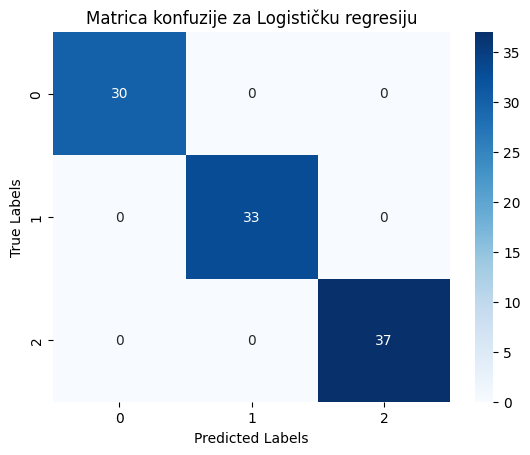

In [ ]:
plot_confusion_matrix(y_test, prediction_logistic, "Matrica konfuzije za Logističku regresiju")


KNN

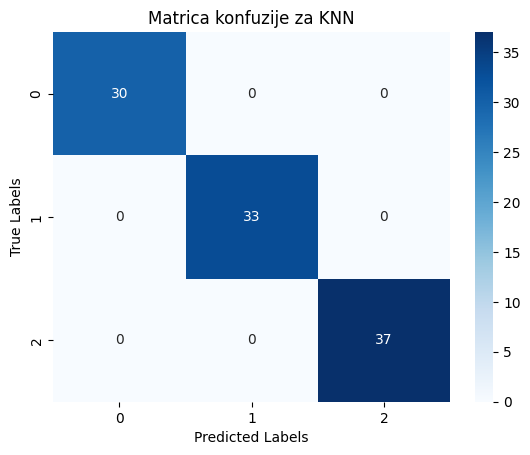

In [ ]:
plot_confusion_matrix(y_test, prediction_knn, "Matrica konfuzije za KNN")

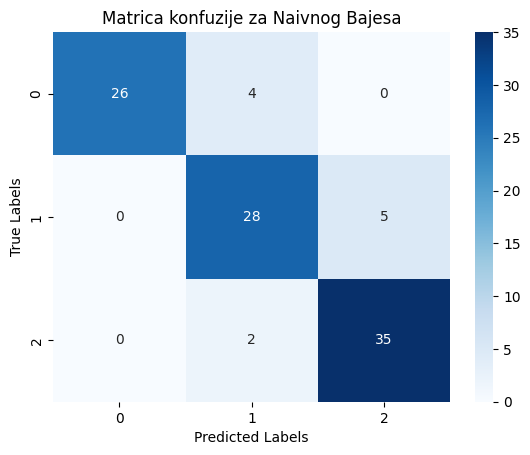

In [ ]:
plot_confusion_matrix(y_test, prediction_nb, "Matrica konfuzije za Naivnog Bajesa")

Poređenje tačnosti modela


> Logistička regresija

> KNN

> Naivni Bajes







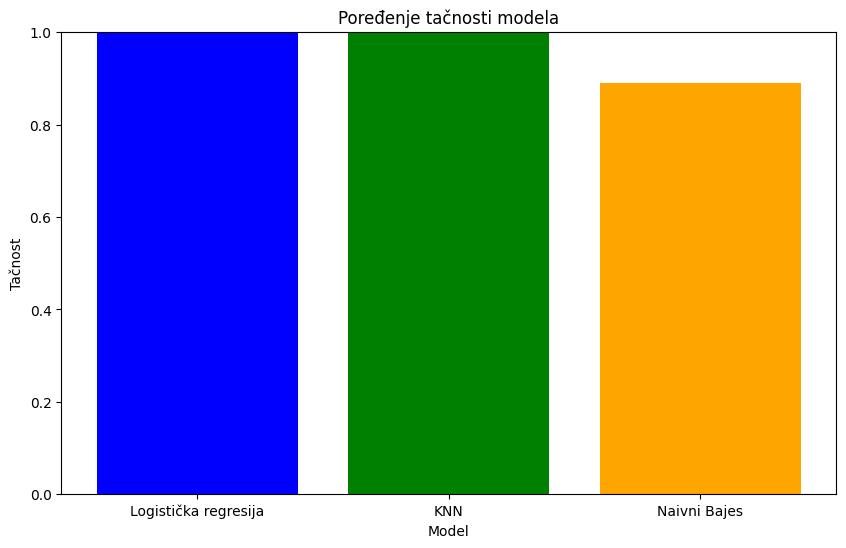

In [ ]:
accuracies = [accuracy_logistic, accuracy_knn, accuracy_nb]
models = ['Logistička regresija', 'KNN', 'Naivni Bajes']


plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Poređenje tačnosti modela')
plt.xlabel('Model')
plt.ylabel('Tačnost')
plt.ylim(0.0, 1.0)
plt.show()

#**PCA**

---


*Principal Component Analysis*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

Podela podataka na trening i test skup i standardizacija podataka

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.1, random_state=10)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Primena PCA za smanjenje dimenzionalnosti podataka

In [ ]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

Optimizacija hiperparametara modela korišćenjem GridSearchCV

> Logistička regresija

> KNN





In [ ]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(x_train_pca, y_train)
best_params_logistic = grid_search_logistic.best_params_
best_accuracy_logistic = grid_search_logistic.best_score_

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train_pca, y_train)
best_params_knn = grid_search_knn.best_params_
best_accuracy_knn = grid_search_knn.best_score_

Inicijalizacija modela za Naivnog Bajesa

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_pca, y_train)

GaussianNB()

Predikcija modela


> Logistička regresija

> KNN

> Naivni Bajes







In [ ]:
prediction_logistic = grid_search_logistic.predict(x_test_pca)
prediction_knn = grid_search_knn.predict(x_test_pca)
prediction_nb = nb_classifier.predict(x_test_pca)

print("Predikcije za Logističku regresiju:")
print(prediction_logistic)
print("\nPredikcije za KNN:")
print(prediction_knn)
print("\nPredikcije za Naivnog Bayesa:")
print(prediction_nb)

Predikcije za Logističku regresiju:
[1 2 2 0 2 1 2 1 2 1 2 1 1 0 0 1 2 0 2 0 2 0 2 2 2 1 1 0 0 1 0 1 2 0 1 2 1
 2 1 0 1 1 2 1 2 2 0 2 2 1 1 1 1 2 1 2 2 2 0 2 2 0 2 0 2 0 1 2 2 1 0 0 0 1
 1 1 1 1 2 0 2 0 2 1 2 2 2 1 0 2 1 1 0 0 1 1 1 1 1 0]

Predikcije za KNN:
[1 2 2 0 2 1 2 1 2 1 2 1 1 0 0 1 2 0 2 0 2 0 2 2 2 1 1 0 0 1 0 1 2 0 1 2 1
 2 1 0 1 1 2 1 2 2 0 2 2 1 1 1 1 2 1 2 2 2 0 2 2 0 2 0 2 0 1 2 2 1 0 0 0 1
 1 1 1 1 2 0 2 0 2 1 2 2 2 1 0 2 1 1 0 0 1 1 1 1 1 0]

Predikcije za Naivnog Bayesa:
[1 2 2 0 2 1 2 0 2 1 2 1 1 0 0 1 2 1 2 0 2 0 2 2 2 1 0 0 0 1 0 1 2 0 1 2 1
 2 1 0 1 1 2 1 2 2 0 2 2 1 1 1 1 2 1 2 2 2 0 2 2 0 2 0 2 0 1 2 2 1 0 0 0 1
 1 1 1 1 2 0 2 0 2 1 2 2 2 1 0 2 1 1 0 0 1 1 1 1 1 0]


Ispis najboljih parametara


> Logistička regresija

> KNN

*Naivni Bajes nema hiperparametre*


In [ ]:
print("Najbolji parametri za Logističku regresiju:")
print(grid_search_logistic.best_params_)

print("\nNajbolji parametri za K-najbliže susede:")
print(grid_search_knn.best_params_)


Najbolji parametri za Logističku regresiju:
{'C': 1, 'penalty': 'l2'}

Najbolji parametri za K-najbliže susede:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


Metrike sa PCA


> Logistička regresija


> KNN



> Naivni Bajes





In [ ]:
accuracy_logistic_pca = accuracy_score(y_test, prediction_logistic)
precision_logistic_pca = precision_score(y_test, prediction_logistic, average='weighted')
recall_logistic_pca = recall_score(y_test, prediction_logistic, average='weighted')
f1_logistic_pca = f1_score(y_test, prediction_logistic, average='weighted')

print("Metrike za Logističku regresiju sa PCA:")
print("Accuracy:", accuracy_logistic_pca)
print("Precision:", precision_logistic_pca)
print("Recall:", recall_logistic_pca)
print("F1 score:", f1_logistic_pca)


Metrike za Logističku regresiju sa PCA:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [ ]:
accuracy_knn_pca = accuracy_score(y_test, prediction_knn)
precision_knn_pca = precision_score(y_test, prediction_knn, average='weighted')
recall_knn_pca = recall_score(y_test, prediction_knn, average='weighted')
f1_knn_pca = f1_score(y_test, prediction_knn, average='weighted')

print("\nMetrike za KNN sa PCA:")
print("Accuracy:", accuracy_knn_pca)
print("Precision:", precision_knn_pca)
print("Recall:", recall_knn_pca)
print("F1 score:", f1_knn_pca)



Metrike za KNN sa PCA:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [ ]:
accuracy_nb_pca = accuracy_score(y_test, prediction_nb)
precision_nb_pca = precision_score(y_test, prediction_nb, average='weighted')
recall_nb_pca = recall_score(y_test, prediction_nb, average='weighted')
f1_nb_pca = f1_score(y_test, prediction_nb, average='weighted')

print("\nMetrike za Naivnog Bajesa sa PCA:")
print("Accuracy:", accuracy_nb_pca)
print("Precision:", precision_nb_pca)
print("Recall:", recall_nb_pca)
print("F1 score:", f1_nb_pca)


Metrike za Naivnog Bajesa sa PCA:
Accuracy: 0.97
Precision: 0.9704989604989605
Recall: 0.97
F1 score: 0.9700941176470588


  Matrica konfuzije


> Logistička regresija

> KNN

> Naivni Bajes






In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

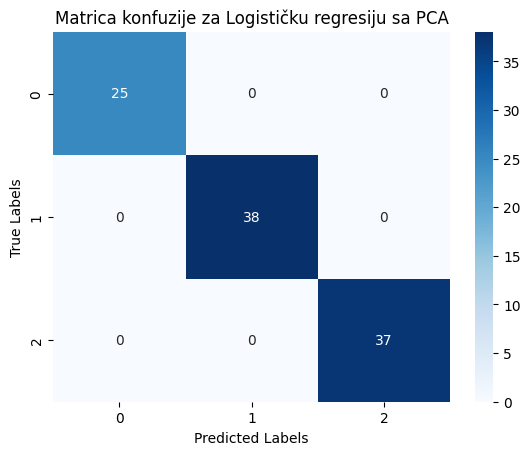

In [ ]:
plot_confusion_matrix(y_test, prediction_logistic, "Matrica konfuzije za Logističku regresiju sa PCA")

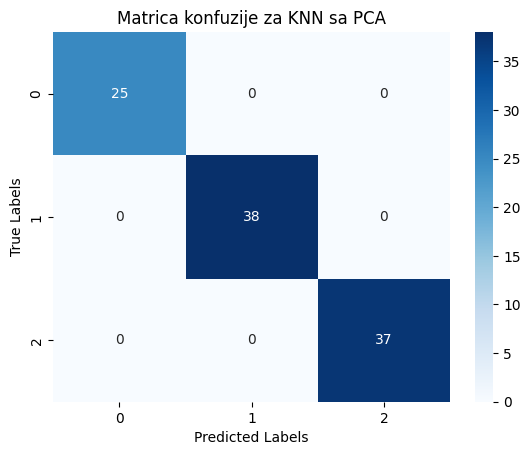

In [ ]:
plot_confusion_matrix(y_test, prediction_knn, "Matrica konfuzije za KNN sa PCA")

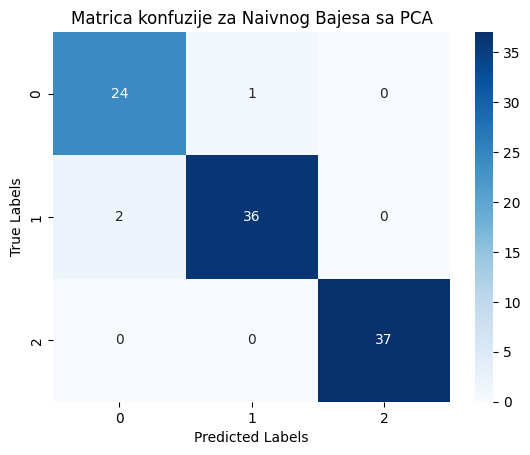

In [ ]:
plot_confusion_matrix(y_test, prediction_nb, "Matrica konfuzije za Naivnog Bajesa sa PCA")

Poređenje tačnosti modela sa PCA

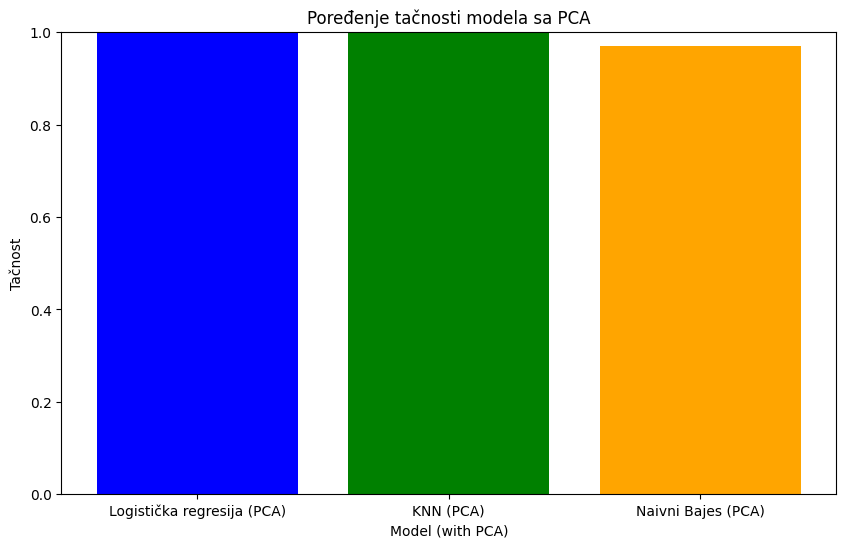

In [ ]:
accuracies_pca = [accuracy_logistic_pca, accuracy_knn_pca, accuracy_nb_pca]
models_pca = ['Logistička regresija (PCA)', 'KNN (PCA)', 'Naivni Bajes (PCA)']


plt.figure(figsize=(10, 6))
plt.bar(models_pca, accuracies_pca, color=['blue', 'green', 'orange'])
plt.title('Poređenje tačnosti modela sa PCA')
plt.xlabel('Model (with PCA)')
plt.ylabel('Tačnost')
plt.ylim(0.0, 1.0)
plt.show()
